In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xlrd
from PIL import  Image
get_ipython().run_line_magic('matplotlib', 'inline')
import pandas as pd
import seaborn as sns#visualization
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score,make_scorer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
import itertools
import category_encoders as ce
import warnings
warnings.filterwarnings("ignore")
import io
from scipy.stats import chi2_contingency
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
%matplotlib inline

In [94]:
# importing the data 
df = pd.read_csv('datasets_2756_4568_pokemon.csv')

In [95]:
# Data overview
print('There are total {} number of columns'.format(df.shape[1]))
print('There are total {} number of rows'.format(df.shape[0]))
print('There are total {} missing values'.format(df.isnull().sum().values.sum()))
print('Features are:'.format(df.columns))
print('Unique values in each feature \n ',df.nunique())

There are total 41 number of columns
There are total 801 number of rows
There are total 522 missing values
Features are:
Unique values in each feature 
  abilities            482
against_bug            5
against_dark           5
against_dragon         4
against_electric       6
against_fairy          5
against_fight          6
against_fire           5
against_flying         5
against_ghost          5
against_grass          5
against_ground         6
against_ice            5
against_normal         4
against_poison         6
against_psychic        6
against_rock           5
against_steel          5
against_water          5
attack               114
base_egg_steps        10
base_happiness         6
base_total           203
capture_rate          34
classfication        588
defense              109
experience_growth      6
height_m              51
hp                    99
japanese_name        801
name                 801
percentage_male        7
pokedex_number       801
sp_attack            

In [234]:
# checking the datatype of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [96]:
# checking the missing or null data 
for i in df.columns:
    print(f'The percentage of missing data in the column {i} is {df[i].isnull().sum()/len(df)}')

The percentage of missing data in the column abilities is 0.0
The percentage of missing data in the column against_bug is 0.0
The percentage of missing data in the column against_dark is 0.0
The percentage of missing data in the column against_dragon is 0.0
The percentage of missing data in the column against_electric is 0.0
The percentage of missing data in the column against_fairy is 0.0
The percentage of missing data in the column against_fight is 0.0
The percentage of missing data in the column against_fire is 0.0
The percentage of missing data in the column against_flying is 0.0
The percentage of missing data in the column against_ghost is 0.0
The percentage of missing data in the column against_grass is 0.0
The percentage of missing data in the column against_ground is 0.0
The percentage of missing data in the column against_ice is 0.0
The percentage of missing data in the column against_normal is 0.0
The percentage of missing data in the column against_poison is 0.0
The percenta

# As we can see the amount of missing data are 
1. height_m has 2% of missing data
2. percentage_male has 12% of missing data
3. type2 has 47% of missng data
4. weight_kg has 2% of missing data

In [98]:
# dealing with the abilites columns since there are lot of abilites associated with each pokemon
# creating a loop to filter all the unique abilites within the abilities
unpack_list = []
for i in list_abilites:
    for j in i.split(','):
        a = j.replace('[','').replace(']','').replace('\'','').strip()
        unpack_list.append(a)

# creating the occurance of each abilities
cnt = []
for i in set(unpack_list):
    a = unpack_list.count(i)
    cnt.append((i,a))
    
# sorting the occurance of the all the abilities
from operator import itemgetter
sorted_data = sorted(cnt,key = itemgetter(1))

# filtering only the abilites which has good occuracnce of the abilites
fnl = [i[0]for i in list(filter(lambda x:x[1]>=4,cnt))]

In [99]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [136]:
# creating the copy of the dataframe
fn_df = df.copy()

In [137]:
# creating features for the ablilities of the pokemon
for i in fnl:
     fn_df[i] = fn_df['abilities'].str.contains(i).replace({True:1,False:0})

In [138]:
# data overview
fn_df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,Anger Point,Levitate,Magnet Pull,Justified,Mold Breaker,Water Absorb,Hyper Cutter,Chlorophyll,Vital Spirit,Plus,Snow Warning,Magic Guard,Guts,Contrary,Oblivious,Defiant,Damp,Swarm,Iron Fist,Sand Veil,Illuminate,Overgrow,Motor Drive,Tangled Feet,Unaware,Telepathy,Battle Armor,Volt Absorb,Rock Head,Light Metal,Serene Grace,Wonder Skin,Dry Skin,Compoundeyes,Snow Cloak,Cursed Body,Rivalry,Sand Stream,Effect Spore,Static,Torrent,Pressure,Keen Eye,Competitive,Shed Skin,Drought,Unnerve,Analytic,Synchronize,Steadfast,Anticipation,Pickpocket,Hydration,Solid Rock,Overcoat,Limber,Blaze,No Guard,Sturdy,Sand Rush,Shield Dust,Regenerator,Poison Touch,Weak Armor,Prankster,Flower Veil,Unburden,Sniper,Big Pecks,Cute Charm,Flash Fire,Lightningrod,Simple,Huge Power,Natural Cure,Water Veil,Storm Drain,Download,Rough Skin,Gluttony,Infiltrator,Healer,Scrappy,Protean,Frisk,Quick Feet,Flame Body,Leaf Guard,Cloud Nine,Forewarn,Rain Dish,Soundproof,Own Tempo,Sand Force,Harvest,Skill Link,Sheer Force,Clear Body,Moody,Hustle,Heavy Metal,Intimidate,Technician,Pickup,Poison Point,Early Bird,Minus,Beast Boost,Stench,Klutz,Slush Rush,Adaptability,Symbiosis,Inner Focus,Tinted Lens,Aftermath,Swift Swim,Suction Cups,Sweet Veil,Super Luck,Insomnia,Sap Sipper,Speed Boost,Strong Jaw,Sticky Hold,Shadow Tag,Solar Power,Moxie,Friend Guard,Magician,Reckless,Rattled,Run Away,Liquid Ooze,Shell Armor,Bulletproof,Trace,Ice Body,Thick Fat,Honey Gather
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,

# dropping the irrelavent feature
1. abilities columns have already been derived 
2. japanes name 
3. name of the pokeman

In [140]:
# dropping the columns above
fn_df.drop(['japanese_name','name','abilities'],axis = 1,inplace = True)

In [141]:
# getting overview of the data
fn_df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,Anger Point,Levitate,Magnet Pull,Justified,Mold Breaker,Water Absorb,Hyper Cutter,Chlorophyll,Vital Spirit,Plus,Snow Warning,Magic Guard,Guts,Contrary,Oblivious,Defiant,Damp,Swarm,Iron Fist,Sand Veil,Illuminate,Overgrow,Motor Drive,Tangled Feet,Unaware,Telepathy,Battle Armor,Volt Absorb,Rock Head,Light Metal,Serene Grace,Wonder Skin,Dry Skin,Compoundeyes,Snow Cloak,Cursed Body,Rivalry,Sand Stream,Effect Spore,Static,Torrent,Pressure,Keen Eye,Competitive,Shed Skin,Drought,Unnerve,Analytic,Synchronize,Steadfast,Anticipation,Pickpocket,Hydration,Solid Rock,Overcoat,Limber,Blaze,No Guard,Sturdy,Sand Rush,Shield Dust,Regenerator,Poison Touch,Weak Armor,Prankster,Flower Veil,Unburden,Sniper,Big Pecks,Cute Charm,Flash Fire,Lightningrod,Simple,Huge Power,Natural Cure,Water Veil,Storm Drain,Download,Rough Skin,Gluttony,Infiltrator,Healer,Scrappy,Protean,Frisk,Quick Feet,Flame Body,Leaf Guard,Cloud Nine,Forewarn,Rain Dish,Soundproof,Own Tempo,Sand Force,Harvest,Skill Link,Sheer Force,Clear Body,Moody,Hustle,Heavy Metal,Intimidate,Technician,Pickup,Poison Point,Early Bird,Minus,Beast Boost,Stench,Klutz,Slush Rush,Adaptability,Symbiosis,Inner Focus,Tinted Lens,Aftermath,Swift Swim,Suction Cups,Sweet Veil,Super Luck,Insomnia,Sap Sipper,Speed Boost,Strong Jaw,Sticky Hold,Shadow Tag,Solar Power,Moxie,Friend Guard,Magician,Reckless,Rattled,Run Away,Liquid Ooze,Shell Armor,Bulletproof,Trace,Ice Body,Thick Fat,Honey Gather
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,88.1,1,65,65,45,grass,poison,6.9,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,88.1,2,80,80,60,grass,poison,13.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,88.1,3,122,120,80,grass,poison,100.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,88.1,4,60,50,65,fire,NaN,8.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,88.1,5,80,65,80,fire,NaN,19.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [142]:
# seperating the categorical column and numerical column
cat_col = ['classfication','type1','type2']
num_col = [i for i in fn_df.columns if i not in cat_col]
target_col = ['is_lengendary']

In [150]:
# null values checking
missing_col = fn_df.isnull().sum()[fn_df.isnull().sum()>0].keys().tolist()

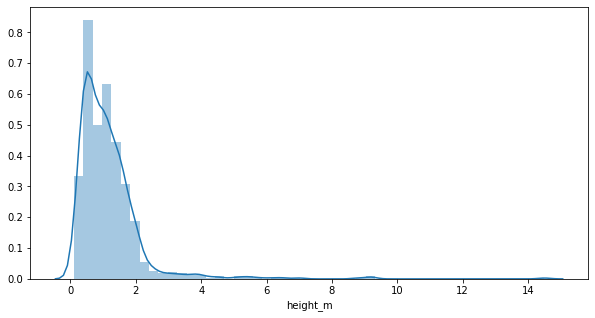

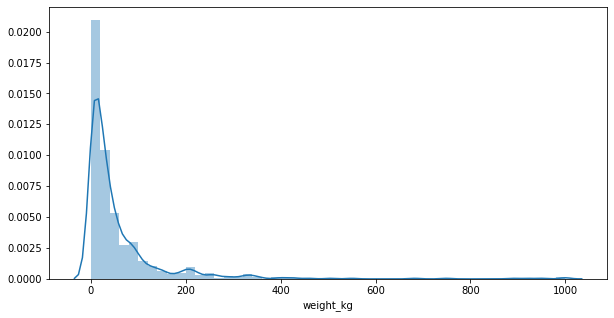

In [167]:
# imputation of the numerical columns
for i in ['height_m','weight_kg']:
    plt.figure(figsize = (10,5))
    sns.distplot(fn_df[i])
    plt.show()

In [165]:
# checking the percentage male counts for flag 0 as legendary 
fn_df.loc[fn_df['is_legendary']==0]['percentage_male'].value_counts().to_dict()

{50.0: 500, 88.1: 111, 0.0: 25, 24.6: 24, 75.4: 19, 100.0: 15, 11.2: 2}

In [166]:
# checking the percentage male counts for flag 1 as legendary 
fn_df.loc[fn_df['is_legendary']==1]['percentage_male'].value_counts().to_dict()

{100.0: 4, 0.0: 2, 50.0: 1}

In [171]:
# as we can see the distribution of the height column and weight column has right skewed data 
# we will impute the data with median of both the feature 
fn_df['height_m'].fillna(value = fn_df['height_m'].median(),inplace = True)
fn_df['weight_kg'].fillna(value = fn_df['weight_kg'].median(),inplace = True)

In [194]:
# imputing the percentage_male feature based on flag of is legendary
fn_df['imputed_percentage_male']=np.where(((df['percentage_male'].isnull()) & (df['is_legendary']==0)),50,df['percentage_male'])
fn_df['imputed_percentage_male'].fillna(value = 100,inplace = True)


# dropping the old column which is percentage_male
fn_df.drop('percentage_male',axis = 1,inplace = True)

In [198]:
# checking the missing columns 
fn_df.isnull().sum()

against_bug                  0
against_dark                 0
against_dragon               0
against_electric             0
against_fairy                0
against_fight                0
against_fire                 0
against_flying               0
against_ghost                0
against_grass                0
against_ground               0
against_ice                  0
against_normal               0
against_poison               0
against_psychic              0
against_rock                 0
against_steel                0
against_water                0
attack                       0
base_egg_steps               0
base_happiness               0
base_total                   0
capture_rate                 0
classfication                0
defense                      0
experience_growth            0
height_m                     0
hp                           0
pokedex_number               0
sp_attack                    0
sp_defense                   0
speed                        0
type1   

In [201]:
# imputing the data for type2 features
fn_df['type2'].fillna(value = 'missing',inplace = True)

In [202]:
# checking the features for the missing data
fn_df.isnull().sum()

against_bug                0
against_dark               0
against_dragon             0
against_electric           0
against_fairy              0
against_fight              0
against_fire               0
against_flying             0
against_ghost              0
against_grass              0
against_ground             0
against_ice                0
against_normal             0
against_poison             0
against_psychic            0
against_rock               0
against_steel              0
against_water              0
attack                     0
base_egg_steps             0
base_happiness             0
base_total                 0
capture_rate               0
classfication              0
defense                    0
experience_growth          0
height_m                   0
hp                         0
pokedex_number             0
sp_attack                  0
sp_defense                 0
speed                      0
type1                      0
type2                      0
weight_kg     

# As we can see we have imputed the missing value and there is no missing value anymore

In [216]:
# EDA
Cat_col = ['classfication','type1','type2']
Num_col = [i for i in fn_df.columns if i not in Cat_col and i not in ['experience_growth']+fnl]
Target_col = ['is_legendary']

In [ ]:
'percentage_male','type1', 'type2', 'height_m', 'weight_kg', 
                     'experience_growth', 'hp', 'attack','base_total',
                     'defense','sp_attack', 'sp_defense', 'speed', 'capture_rate'

In [203]:
fn_df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,Anger Point,Levitate,Magnet Pull,Justified,Mold Breaker,Water Absorb,Hyper Cutter,Chlorophyll,Vital Spirit,Plus,Snow Warning,Magic Guard,Guts,Contrary,Oblivious,Defiant,Damp,Swarm,Iron Fist,Sand Veil,Illuminate,Overgrow,Motor Drive,Tangled Feet,Unaware,Telepathy,Battle Armor,Volt Absorb,Rock Head,Light Metal,Serene Grace,Wonder Skin,Dry Skin,Compoundeyes,Snow Cloak,Cursed Body,Rivalry,Sand Stream,Effect Spore,Static,Torrent,Pressure,Keen Eye,Competitive,Shed Skin,Drought,Unnerve,Analytic,Synchronize,Steadfast,Anticipation,Pickpocket,Hydration,Solid Rock,Overcoat,Limber,Blaze,No Guard,Sturdy,Sand Rush,Shield Dust,Regenerator,Poison Touch,Weak Armor,Prankster,Flower Veil,Unburden,Sniper,Big Pecks,Cute Charm,Flash Fire,Lightningrod,Simple,Huge Power,Natural Cure,Water Veil,Storm Drain,Download,Rough Skin,Gluttony,Infiltrator,Healer,Scrappy,Protean,Frisk,Quick Feet,Flame Body,Leaf Guard,Cloud Nine,Forewarn,Rain Dish,Soundproof,Own Tempo,Sand Force,Harvest,Skill Link,Sheer Force,Clear Body,Moody,Hustle,Heavy Metal,Intimidate,Technician,Pickup,Poison Point,Early Bird,Minus,Beast Boost,Stench,Klutz,Slush Rush,Adaptability,Symbiosis,Inner Focus,Tinted Lens,Aftermath,Swift Swim,Suction Cups,Sweet Veil,Super Luck,Insomnia,Sap Sipper,Speed Boost,Strong Jaw,Sticky Hold,Shadow Tag,Solar Power,Moxie,Friend Guard,Magician,Reckless,Rattled,Run Away,Liquid Ooze,Shell Armor,Bulletproof,Trace,Ice Body,Thick Fat,Honey Gather,imputed_percentage_male
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,1,65,65,45,grass,poison,6.9,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88.1
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,2,80,80,60,grass,poison,13.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88.1
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,3,122,120,80,grass,poison,100.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88.1
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,4,60,50,65,fire,missing,8.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,88.1
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,5,80,65,80,fire,missing,19.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

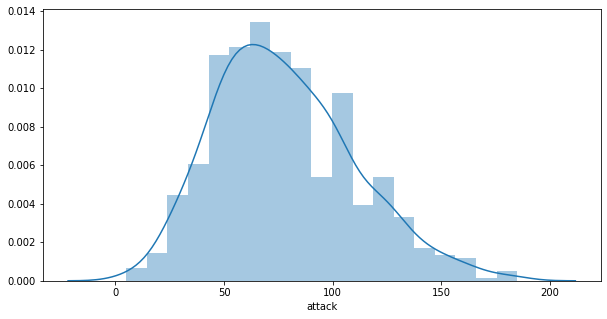

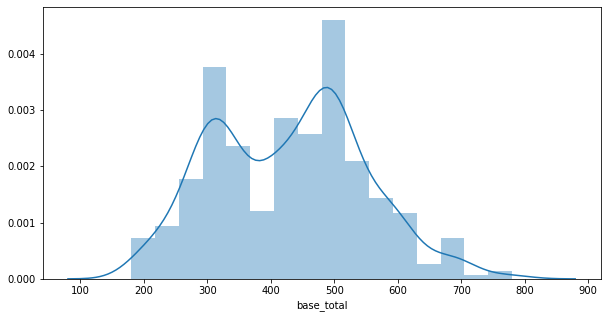

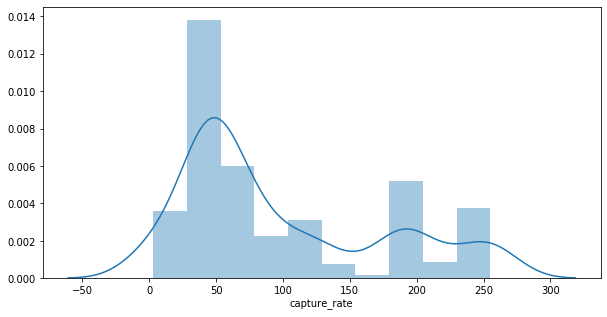

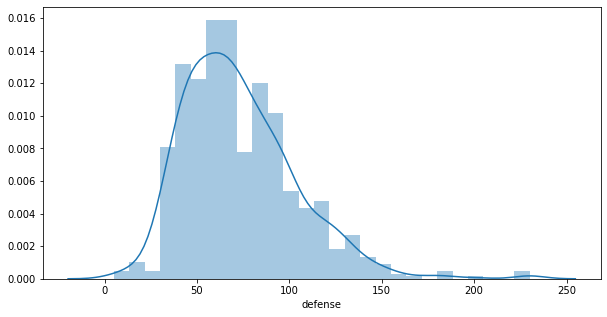

In [239]:
# checking the distribution of the data 
for i in ['attack','base_total','capture_rate','defense']:
    plt.figure(figsize = (10,5))
    sns.distplot(fn_df[i])
    plt.show()

In [238]:
# replacing the value of 30(metriot) to 30
fn_df['capture_rate'].replace({'30 (Meteorite)255 (Core)':30},inplace = True)

# converiting the capture_rate column to numeric column
fn_df['capture_rate'] = pd.to_numeric(fn_df['capture_rate'])

In [246]:
# encoding the type1 column
encode = ce.CountEncoder()
fn_df['type1'] = encode.fit_transform(fn_df['type1'])

In [250]:
# encoding the type2 column
encode = ce.CountEncoder()
fn_df['type2'] = encode.fit_transform(fn_df['type2'])

In [ ]:
# encoding the type2 column
encode = ce.CountEncoder()
fn_df['type2'] = encode.fit_transform(fn_df['type2'])

In [252]:
# encoding classfication column as frequency encoding
encode = ce.CountEncoder()
fn_df['classfication'] = encode.fit_transform(fn_df['classfication'])

In [243]:
# aplying extratree for feature selection
from sklearn.ensemble import ExtraTreesClassifier

In [253]:
# traing the model with the default setting

X = fn_df.loc[:,[i for i in fn_df.columns if i !='is_legendary']]
Y = fn_df.loc[:,'is_legendary']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = .2,stratify= Y)

In [257]:
# training the model for feature selection
ExTree = ExtraTreesClassifier().fit(X =X_train,y = Y_train)

In [263]:
# getting the sense of the important feature

fo = pd.DataFrame({'feature_imp' : pd.Series(ExTree.feature_importances_),'columns':pd.Series(X_train.columns)})

In [267]:
# sorting the column based on the importance of the column in prediction
fo1 = fo.sort_values(by =  'feature_imp',ascending = False)

In [280]:
# filtering top 30 column with the importance of the columns
important_feature = pd.merge(fo1,fo1['feature_imp'].nlargest(30),left_index = True,right_index = True)['columns'].values.tolist()

In [292]:
x = fn_df.loc[:,[i for i in important_feature]]
y = fn_df.loc[:,'is_legendary']

In [295]:
# splitting the data for train and test
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = .20,stratify = y)

In [296]:

# building first model logistic regression
lr = LogisticRegression()

# fitting logistic regression
lr_model = lr.fit(X_train,Y_train)



In [298]:
# creating a function to show all the metrics for the model and performance
def model_eval(model):
    prediction = model.predict(X_test)
    print('Accuracy of the model is\n {}'.format(accuracy_score(Y_test,prediction)))
    print('precision of the model is\n {}'.format(precision_score(Y_test,prediction)))
    print('recall of the model is\n {}\n'.format(recall_score(Y_test,prediction)))
    print(classification_report(Y_test,prediction))
    print('Confusion maxtric is\n {}'.format(confusion_matrix(Y_test,model.predict(X_test))))
    
# calling the function 
model_eval(lr_model)

Accuracy of the model is
 0.9875776397515528
precision of the model is
 0.9285714285714286
recall of the model is
 0.9285714285714286

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       147
           1       0.93      0.93      0.93        14

    accuracy                           0.99       161
   macro avg       0.96      0.96      0.96       161
weighted avg       0.99      0.99      0.99       161

Confusion maxtric is
 [[146   1]
 [  1  13]]


In [299]:
y.value_counts()

0    731
1     70
Name: is_legendary, dtype: int64